In [2]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
print(tf.__version__)

2.8.0


In [3]:
# load mnist_data and assign them to train and text datasets
mnist_data = tf.keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2573 - accuracy: 0.9218 - val_loss: 0.1049 - val_accuracy: 0.9672
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1193 - accuracy: 0.9641 - val_loss: 0.0903 - val_accuracy: 0.9723
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0897 - accuracy: 0.9726 - val_loss: 0.0793 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0779 - accuracy: 0.9755 - val_loss: 0.0712 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9790 - val_loss: 0.0710 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9811 - val_loss: 0.0655 - val_accuracy: 0.9797
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0523 - accuracy: 0.9830 - val_loss: 0.0742 - val_accuracy:

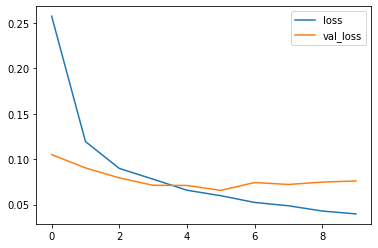

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

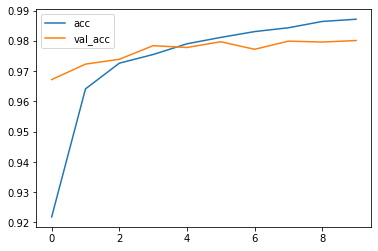

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9801


[0.07594543695449829, 0.9800999760627747]

Confusion matrix, without normalization
[[ 976    0    0    1    0    0    1    0    2    0]
 [   0 1124    2    2    0    1    3    1    2    0]
 [   9    0 1003    2    2    0    4    7    4    1]
 [   0    0    1  998    0    2    0    4    3    2]
 [   1    0    2    0  961    0    6    2    1    9]
 [   2    0    0   10    1  868    7    0    3    1]
 [   6    2    0    1    2    5  941    0    1    0]
 [   3    5    5    0    0    0    0 1010    2    3]
 [   5    1    3    3    5    3    1    3  947    3]
 [   6    2    0    1   17    1    0    6    3  973]]


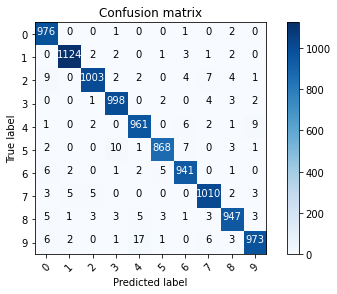

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

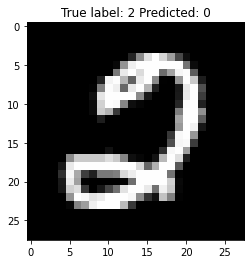

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));